In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("custom_practice_dataset.csv", index_col="Customer_ID")
df

from sklearn.preprocessing import Binarizer, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
tf = ColumnTransformer([("Binning", KBinsDiscretizer(strategy="quantile",encode="ordinal"), ["Annual_Income"]),("Binarisation",Binarizer(threshold=50, copy=False),["Spending_Score"])], remainder="passthrough")
df_ = tf.fit_transform(df)
df_ = pd.DataFrame(df_,columns=(["Annual_Income","Spending_Score"]+[col for col in df.columns if col not in ["Annual_Income","Spending_Score"]]))

df_[["Annual_Income","Spending_Score"]] = df_[["Annual_Income","Spending_Score"]].astype(np.int32)

import matplotlib.pyplot as plt
import seaborn as sns

bin_range = tf.named_transformers_["Binning"].bin_edges_[0].tolist()

df_["income_range"] = pd.cut(x=df["Annual_Income"],bins=bin_range)
df_

,Annual_Income,Spending_Score,Age,Subscription_Status,Signup_Date,Favorite_Color,Last_Purchase_Amount,income_range
0,1,0,69,Inactive,2020-01-01,Red,347.381081,NaN
1,4,1,28,Inactive,2020-01-16,NaN,475.120106,"(40143.2, 55190.8]"
2,0,0,21,Cancelled,2020-01-31,Blue,287.496104,"(105547.4, 115123.0]"
3,2,1,51,Active,2020-02-15,Red,74.008068,"(20395.0, 40143.2]"
4,2,1,55,Inactive,2020-03-01,Yellow,335.184436,"(55190.8, 77109.2]"
5,0,1,44,123,2020-03-16,Red,459.175483,"(55190.8, 77109.2]"
6,1,0,23,Cancelled,2020-03-31,NaN,227.124838,NaN
7,2,0,53,Inactive,2020-04-15,Blue,249.982491,"(40143.2, 55190.8]"
8,1,1,57,Active,2020-04-30,Red,283.841161,"(55190.8, 77109.2]"
9,3,1,30,Active,2020-05-15,Green,383.458661,"(40143.2, 55190.8]"


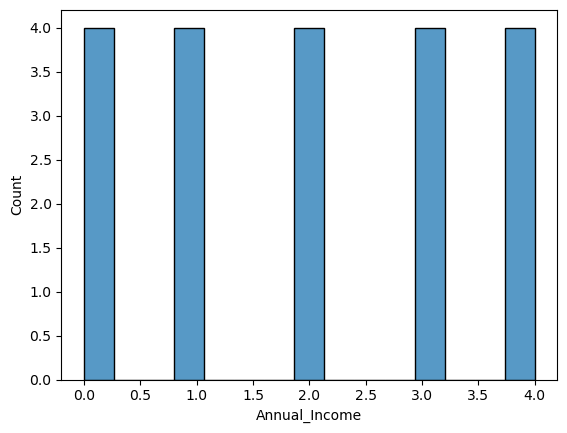

In [2]:
sns.histplot(df_["Annual_Income"],bins=15)
plt.show()

In [3]:
df.dropna(inplace=True)

In [4]:
df

,Age,Annual_Income,Subscription_Status,Signup_Date,Spending_Score,Favorite_Color,Last_Purchase_Amount
Customer_ID,,,,,,,
1,69,45469,Inactive,2020-01-01,23.013124,Red,347.381081
3,21,26002,Cancelled,2020-01-31,17.598504,Blue,287.496104
4,51,61672,Active,2020-02-15,78.775480,Red,74.008068
5,55,72834,Inactive,2020-03-01,90.282046,Yellow,335.184436
6,44,20395,123,2020-03-16,89.760830,Red,459.175483
8,53,73098,Inactive,2020-04-15,5.329487,Blue,249.982491
9,57,41065,Active,2020-04-30,79.072962,Red,283.841161
10,30,91494,Active,2020-05-15,76.330879,Green,383.458661
13,40,105052,Active,2020-06-29,96.015306,Red,265.098235


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 1 to 20
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   15 non-null     int64  
 1   Annual_Income         15 non-null     int64  
 2   Subscription_Status   15 non-null     object 
 3   Signup_Date           15 non-null     object 
 4   Spending_Score        15 non-null     float64
 5   Favorite_Color        15 non-null     object 
 6   Last_Purchase_Amount  15 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 960.0+ bytes


In [33]:
from datetime import datetime

In [34]:
df["Signup_Date"] = pd.to_datetime(df["Signup_Date"])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 1 to 20
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Age                   15 non-null     int64          
 1   Annual_Income         15 non-null     int64          
 2   Subscription_Status   15 non-null     object         
 3   Signup_Date           15 non-null     datetime64[ns] 
 4   Spending_Score        15 non-null     float64        
 5   Favorite_Color        15 non-null     object         
 6   Last_Purchase_Amount  15 non-null     float64        
 7   Is_Weekend            15 non-null     int32          
 8   diff                  15 non-null     timedelta64[ns]
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(2), timedelta64[ns](1)
memory usage: 1.1+ KB


In [36]:
df['Is_Weekend']= np.where(df["Signup_Date"].dt.day_name().isin(["Saturday","Sunday"]),1,0)

In [37]:
df

,Age,Annual_Income,Subscription_Status,Signup_Date,Spending_Score,Favorite_Color,Last_Purchase_Amount,Is_Weekend,diff
Customer_ID,,,,,,,,,
1,69,45469,Inactive,2020-01-01,23.013124,Red,347.381081,0,1822 days 20:48:41.868568
3,21,26002,Cancelled,2020-01-31,17.598504,Blue,287.496104,0,1792 days 20:48:41.868568
4,51,61672,Active,2020-02-15,78.775480,Red,74.008068,1,1777 days 20:48:41.868568
5,55,72834,Inactive,2020-03-01,90.282046,Yellow,335.184436,1,1762 days 20:48:41.868568
6,44,20395,123,2020-03-16,89.760830,Red,459.175483,0,1747 days 20:48:41.868568
8,53,73098,Inactive,2020-04-15,5.329487,Blue,249.982491,0,1717 days 20:48:41.868568
9,57,41065,Active,2020-04-30,79.072962,Red,283.841161,0,1702 days 20:48:41.868568
10,30,91494,Active,2020-05-15,76.330879,Green,383.458661,0,1687 days 20:48:41.868568
13,40,105052,Active,2020-06-29,96.015306,Red,265.098235,0,1642 days 20:48:41.868568


In [42]:
df["monthspass"] = (datetime.today()-df["Signup_Date"])/np.timedelta64(1,"D")

In [43]:
df

,Age,Annual_Income,Subscription_Status,Signup_Date,Spending_Score,Favorite_Color,Last_Purchase_Amount,Is_Weekend,diff,monthspass
Customer_ID,,,,,,,,,,
1,69,45469,Inactive,2020-01-01,23.013124,Red,347.381081,0,1822 days 20:48:41.868568,1822.872324
3,21,26002,Cancelled,2020-01-31,17.598504,Blue,287.496104,0,1792 days 20:48:41.868568,1792.872324
4,51,61672,Active,2020-02-15,78.775480,Red,74.008068,1,1777 days 20:48:41.868568,1777.872324
5,55,72834,Inactive,2020-03-01,90.282046,Yellow,335.184436,1,1762 days 20:48:41.868568,1762.872324
6,44,20395,123,2020-03-16,89.760830,Red,459.175483,0,1747 days 20:48:41.868568,1747.872324
8,53,73098,Inactive,2020-04-15,5.329487,Blue,249.982491,0,1717 days 20:48:41.868568,1717.872324
9,57,41065,Active,2020-04-30,79.072962,Red,283.841161,0,1702 days 20:48:41.868568,1702.872324
10,30,91494,Active,2020-05-15,76.330879,Green,383.458661,0,1687 days 20:48:41.868568,1687.872324
13,40,105052,Active,2020-06-29,96.015306,Red,265.098235,0,1642 days 20:48:41.868568,1642.872324
